In [2]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [3]:
training_data = pd.read_csv('./archive/fashion-mnist_train.csv')

train_y = training_data['label']

train_X = training_data.drop('label',axis=1)

test_data = pd.read_csv('./archive/fashion-mnist_test.csv')

test_y = test_data['label']

test_X = test_data.drop('label',axis=1)

#label
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

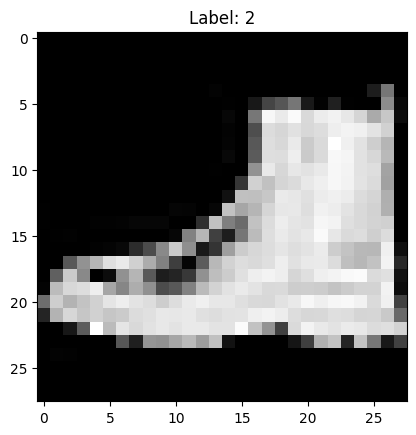

In [4]:
sample_image = train_X.iloc[256].values.reshape(28, 28)  

plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {train_y.iloc[0]}') 
plt.show()

In [5]:
svc = SVC(gamma='scale', kernel='rbf', C=8)
svc.fit(train_X, train_y)

accuracy = svc.score(test_X, test_y)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9089


In [ ]:
svc = SVC(gamma='scale',kernel='rbf',C=8)

cv_results = cross_validate(svc, train_X, train_y, cv=3)

print(f"Validation acc for each fold: {cv_results['test_score']}")
print(f"Mean acc:  {mean(cv_results['test_score'])}")